<a href="https://colab.research.google.com/github/sizanesd/Data-Analysis/blob/master/Copy_of_Snippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
#Outline
#1. Import Libraries
#2. Read Dataset and Describe the Dataset
#3. Exploratory Data Analysis
#4. Dealing with missing values
#5. Fitting the models
#6. Evaluating model Performance and Other Considerations


In [ ]:
#1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
#2. Read Dataset and Describe the Dataset

In [156]:
from google.colab import files
uploaded = files.upload()

Saving Inca_Tribe_House_Prices.csv to Inca_Tribe_House_Prices (6).csv


In [158]:
data = pd.read_csv('Inca_Tribe_House_Prices.csv')

In [159]:
data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Chalet,70000,2.0,2.0,10.0,Yes,Unknown,Fanar De Luna,Cash,Ready to move,Finished,Ain Sukhna
1,Apartment,1500000,3.0,3.0,10.0,No,4,Unknown,Unknown Payment,Ready to move,Unknown,New Hut - El Tagamoa
2,Stand Alone Villa,29000000,5.0,6.0,11.0,No,Unknown,Mivida,Cash,Ready to move,Core & Shell,New Hut - El Tagamoa
3,Chalet,3000000,2.0,2.0,12.0,No,Ground,Marina 5,Cash,Ready to move,Finished,North Coast
4,Apartment,1128000,3.0,2.0,14.0,No,3,Beit Al Watan,Installment,soon,Unknown,New Hut - El Tagamoa


In [162]:
print(data.columns)

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'],
      dtype='object')


In [161]:
data = data.drop(columns=['Compound'])

In [163]:
# Describe data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27322 entries, 0 to 27321
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27322 non-null  object 
 1   Price           27322 non-null  int64  
 2   Bedrooms        27119 non-null  float64
 3   Bathrooms       27151 non-null  float64
 4   Area            26851 non-null  float64
 5   Furnished       27322 non-null  object 
 6   Level           27322 non-null  object 
 7   Payment_Option  27322 non-null  object 
 8   Delivery_Date   27322 non-null  object 
 9   Delivery_Term   27322 non-null  object 
 10  City            27322 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 2.3+ MB
None


In [164]:
print(data.describe(include='all'))

             Type         Price      Bedrooms     Bathrooms          Area  \
count       27322  2.732200e+04  27119.000000  27151.000000  26851.000000   
unique         10           NaN           NaN           NaN           NaN   
top     Apartment           NaN           NaN           NaN           NaN   
freq         8506           NaN           NaN           NaN           NaN   
mean          NaN  4.761822e+06      3.242044      2.811388    229.305711   
std           NaN  6.766653e+06      1.212341      1.354498    161.047915   
min           NaN  3.000000e+04      1.000000      1.000000     10.000000   
25%           NaN  1.150000e+06      3.000000      2.000000    125.000000   
50%           NaN  2.731000e+06      3.000000      3.000000    175.000000   
75%           NaN  5.989000e+06      4.000000      3.000000    275.000000   
max           NaN  2.400000e+08     10.000000     10.000000    998.000000   

       Furnished    Level       Payment_Option  Delivery_Date Delivery_Term

In [ ]:
#3. Exploratory Data Analysis

In [ ]:
######################################Exploratory Data Analysis

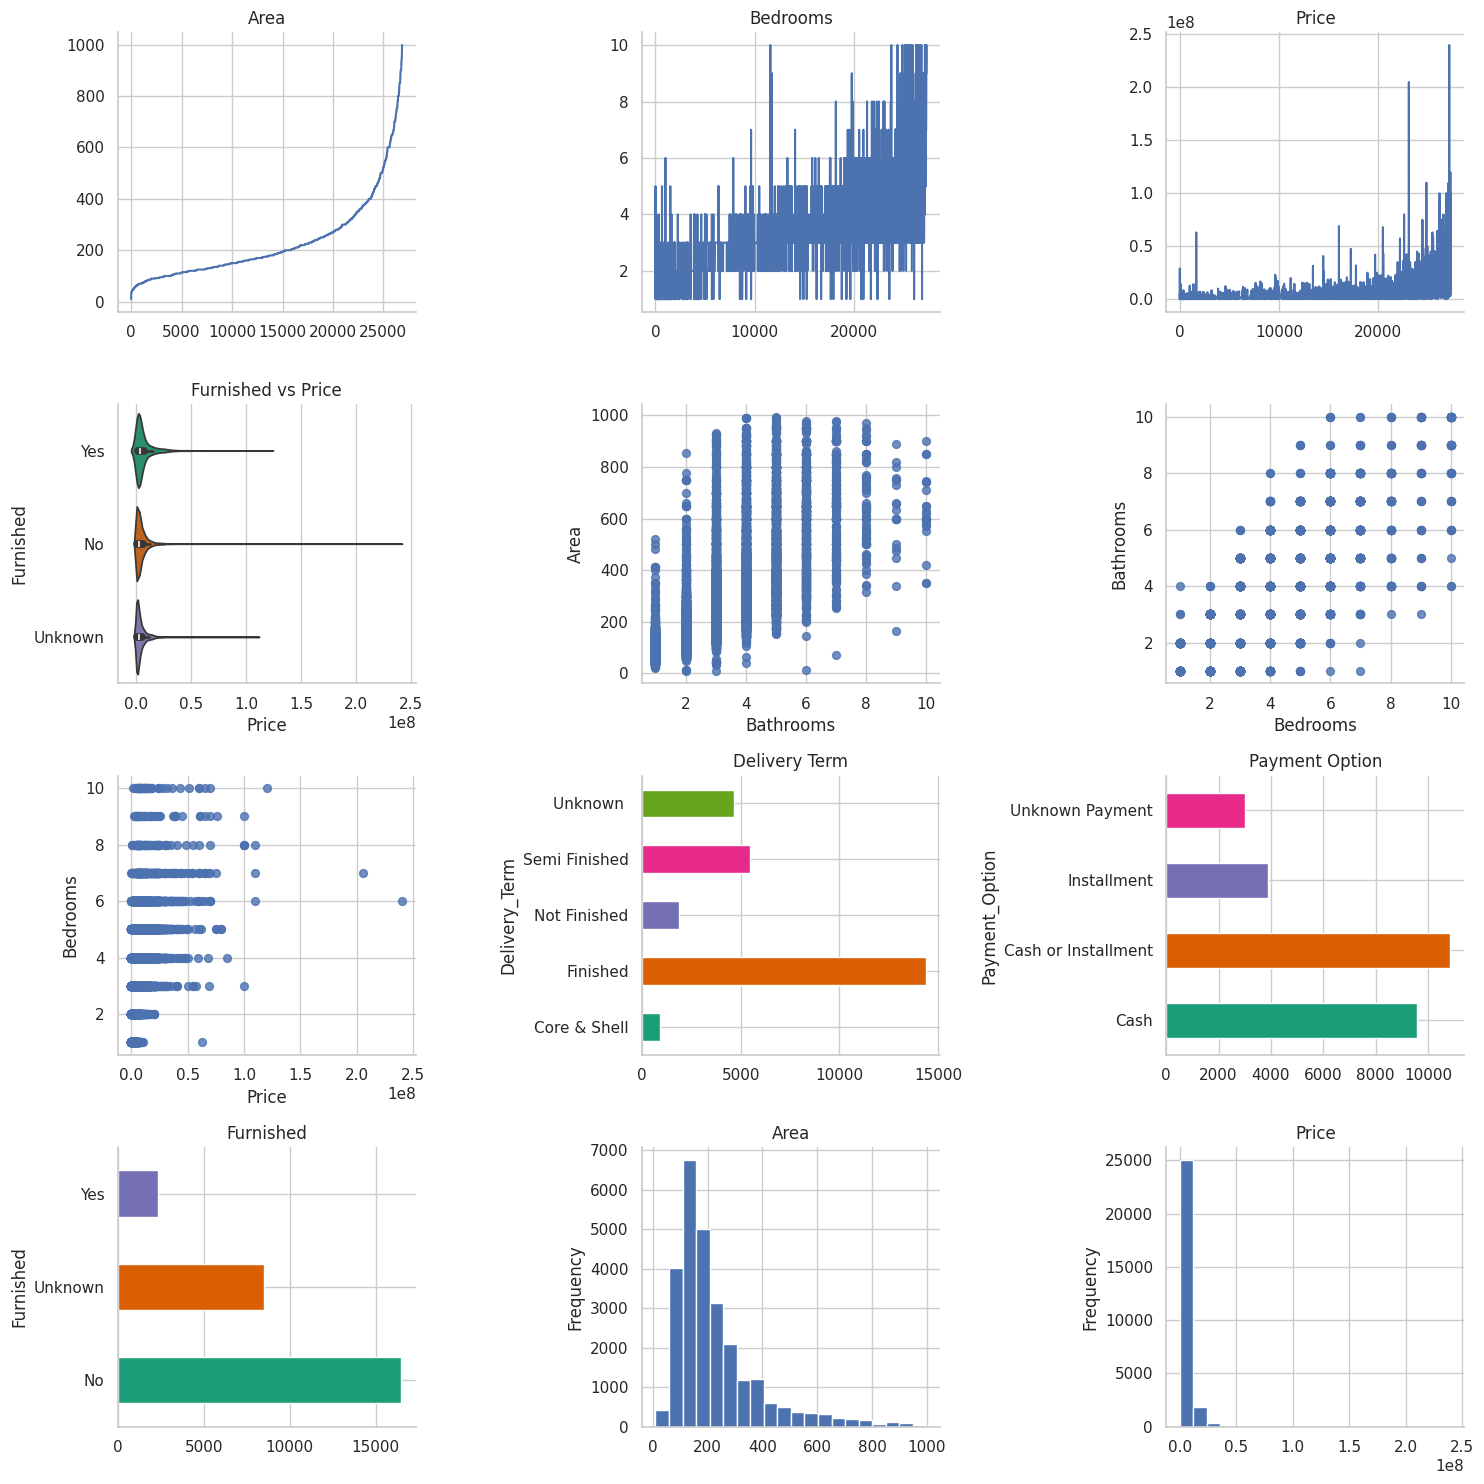

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of rows and columns for the grid
nrows = 4
ncols = 3

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# 1. Area Line Plot
data['Area'].plot(kind='line', ax=axes[0], title='Area')
axes[0].spines[['top', 'right']].set_visible(False)

# 2. Bedrooms Line Plot
data['Bedrooms'].plot(kind='line', ax=axes[1], title='Bedrooms')
axes[1].spines[['top', 'right']].set_visible(False)

# 3. Price Line Plot
data['Price'].plot(kind='line', ax=axes[2], title='Price')
axes[2].spines[['top', 'right']].set_visible(False)

# 4. Furnished vs Price Violin Plot
sns.violinplot(data=data, x='Price', y='Furnished', inner='box', ax=axes[3], palette='Dark2')
axes[3].set_title('Furnished vs Price')
sns.despine(ax=axes[3])

# 5. Bathrooms vs Area Scatter Plot
data.plot(kind='scatter', x='Bathrooms', y='Area', ax=axes[4], s=32, alpha=.8)
axes[4].spines[['top', 'right']].set_visible(False)

# 6. Bedrooms vs Bathrooms Scatter Plot
data.plot(kind='scatter', x='Bedrooms', y='Bathrooms', ax=axes[5], s=32, alpha=.8)
axes[5].spines[['top', 'right']].set_visible(False)

# 7. Price vs Bedrooms Scatter Plot
data.plot(kind='scatter', x='Price', y='Bedrooms', ax=axes[6], s=32, alpha=.8)
axes[6].spines[['top', 'right']].set_visible(False)

# 8. Delivery Term Bar Plot
data.groupby('Delivery_Term').size().plot(kind='barh', ax=axes[7], color=sns.palettes.mpl_palette('Dark2'))
axes[7].set_title('Delivery Term')
axes[7].spines[['top', 'right']].set_visible(False)

# 9. Payment Option Bar Plot
data.groupby('Payment_Option').size().plot(kind='barh', ax=axes[8], color=sns.palettes.mpl_palette('Dark2'))
axes[8].set_title('Payment Option')
axes[8].spines[['top', 'right']].set_visible(False)

# 10. Furnished Bar Plot
data.groupby('Furnished').size().plot(kind='barh', ax=axes[9], color=sns.palettes.mpl_palette('Dark2'))
axes[9].set_title('Furnished')
axes[9].spines[['top', 'right']].set_visible(False)

# 11. Area Histogram
data['Area'].plot(kind='hist', bins=20, ax=axes[10], title='Area')
axes[10].spines[['top', 'right']].set_visible(False)

# 12. Price Histogram
data['Price'].plot(kind='hist', bins=20, ax=axes[11], title='Price')
axes[11].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#4. Dealing with missing values

In [ ]:
# Now we investigate and deal with the presences of missing values

In [166]:
# Function to summarize the DataFrame
def summarize_data(data):
    # Section 1: General Overview
    print("General Overview:")
    print(data.info())
    print("\n")

    # Section 2: Data Types and Missing Values
    summary = pd.DataFrame({
        'Data Type': data.dtypes,
        'Non-Null Count': data.notnull().sum(),
        'Missing Values': data.isnull().sum(),
        'Missing Percentage': (data.isnull().sum() / len(data)) * 100
    })
    print("Data Types and Missing Values:")
    print(summary)
    print("\n")

    # Section 3: Categorical Variables Analysis
    print("Categorical Variables Analysis:")
    for column in data.select_dtypes(include=['object']).columns:
        print(f"\nColumn: {column}")
        print("Unique Values:", data[column].unique())
        print("Value Counts:\n", data[column].value_counts())

    # Section 4: Numerical Variables Analysis
    print("\nNumerical Variables Analysis:")
    for column in data.select_dtypes(include=['int64', 'float64']).columns:
        print(f"\nColumn: {column}")
        print("Descriptive Statistics:\n", data[column].describe())

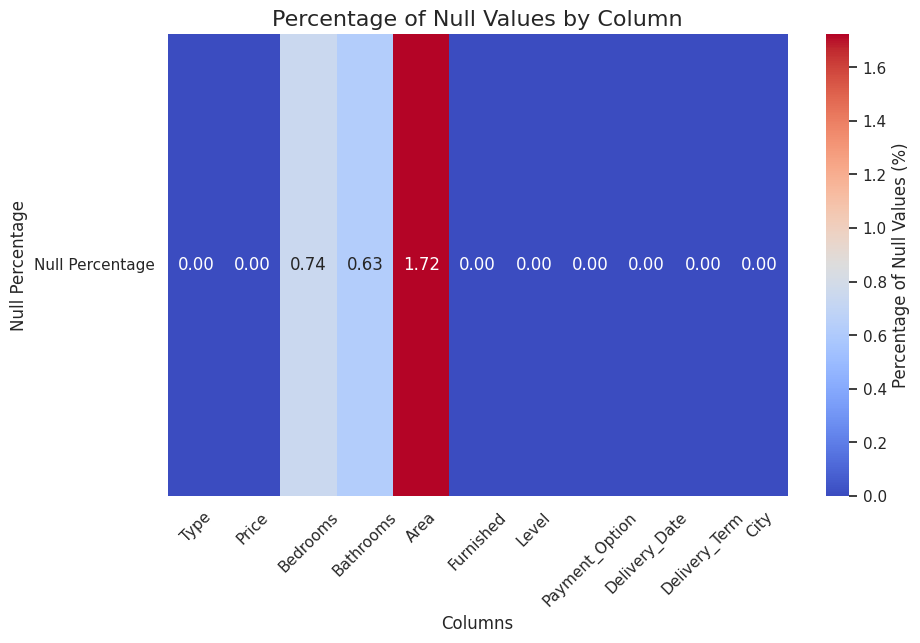

In [167]:
# Function to visualize null value percentages as a heatmap
def visualize_nulls_percentage_heatmap(data):
    # Calculate the percentage of null values for each column
    null_percentage = (data.isnull().sum() / len(data)) * 100

    # Create a DataFrame for heatmap
    null_percentage_df = pd.DataFrame(null_percentage, columns=['Null Percentage'])

    # Set the style for the plot
    sns.set(style='whitegrid')

    # Create a heatmap for null value percentages
    plt.figure(figsize=(10, 6))
    sns.heatmap(null_percentage_df.T, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Percentage of Null Values (%)'})

    plt.title('Percentage of Null Values by Column', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Null Percentage', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Call the visualization function
visualize_nulls_percentage_heatmap(data)

In [ ]:
############################################Missing value imputaion

In [168]:
from sklearn.impute import SimpleImputer
#Identify columns with missing values
missing_info = data.isnull().sum()
print("Missing Values Before Imputation:\n", missing_info[missing_info > 0])

#Impute Numerical Variables
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# Use median for numerical columns
median_imputer = SimpleImputer(strategy='median')
data[numerical_cols] = median_imputer.fit_transform(data[numerical_cols])

#Impute Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns
# Use mode for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = mode_imputer.fit_transform(data[categorical_cols])

# Check for missing values again
missing_info_after = data.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_info_after[missing_info_after > 0])

Missing Values Before Imputation:
 Bedrooms     203
Bathrooms    171
Area         471
dtype: int64

Missing Values After Imputation:
 Series([], dtype: int64)


In [35]:
#5. Fitting the models

In [ ]:
#Now we move in to fitting the machine learning models

In [ ]:
######################### Model fitting

In [169]:
# One-hot encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop(columns=['Price'])  # All features except 'Price'
y = data['Price']  # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
#Linear Regresion
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Fit the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

In [171]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

In [172]:
#Evaluate Model Performance


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate Linear Regression
mae_lin = mean_absolute_error(y_test, y_pred)
mse_lin = mean_squared_error(y_test, y_pred)
r2_lin = r2_score(y_test, y_pred)

print("Linear Regression Metrics:")
print(f"MAE: {mae_lin}, MSE: {mse_lin}, R²: {r2_lin}")

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print(f"MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")

Linear Regression Metrics:
MAE: 2553754.707874812, MSE: 27570251845940.84, R²: 0.4222879631326373

Random Forest Metrics:
MAE: 1878086.7947911122, MSE: 25209746795076.92, R²: 0.4717504123184638


In [ ]:
#6. Evaluating model Performance and Other Considerations

In [ ]:
##################################################Model Results
#Our Results indicate substantial underperformance by both models,
#especially the linear regression models,
#we consider two additional models

In [173]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    print("\n")


# Evaluate Linear Regression
evaluate_model(y_test, y_pred, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Metrics:
Mean Absolute Error (MAE): 2553754.707874812
Mean Squared Error (MSE): 27570251845940.84
R² Score: 0.4222879631326373


Random Forest Metrics:
Mean Absolute Error (MAE): 1878086.7947911122
Mean Squared Error (MSE): 25209746795076.92
R² Score: 0.4717504123184638




In [ ]:
################################### We consider to additional models to see if they can give a better performance
### XGBoost Model
### LightGBM Model

In [174]:
import xgboost as xgb
import lightgbm as lgb


# XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print(f"MAE: {mae_xgb}, MSE: {mse_xgb}, R²: {r2_xgb}")

# LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Make predictions with LightGBM
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate LightGBM model performance
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print("\nLightGBM Metrics:")
print(f"MAE: {mae_lgb}, MSE: {mse_lgb}, R²: {r2_lgb}")

XGBoost Metrics:
MAE: 2047277.3890366787, MSE: 25087699018469.54, R²: 0.47430782347353695
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 21857, number of used features: 87
[LightGBM] [Info] Start training from score 4794931.580821

LightGBM Metrics:
MAE: 2036210.8238366633, MSE: 22977847838245.1, R²: 0.5185180261813489


In [ ]:
# The best performing model is the LightGBM, although its performance is not too diffrent from the other models

In [ ]:
########Additional Consideration - Outliers to see why the possible reasons for underperformance in the Linear Regression is.

Price - Outliers Count: 1982
Area - Outliers Count: 2175
Bedrooms - Outliers Count: 2242
Bathrooms - Outliers Count: 2855


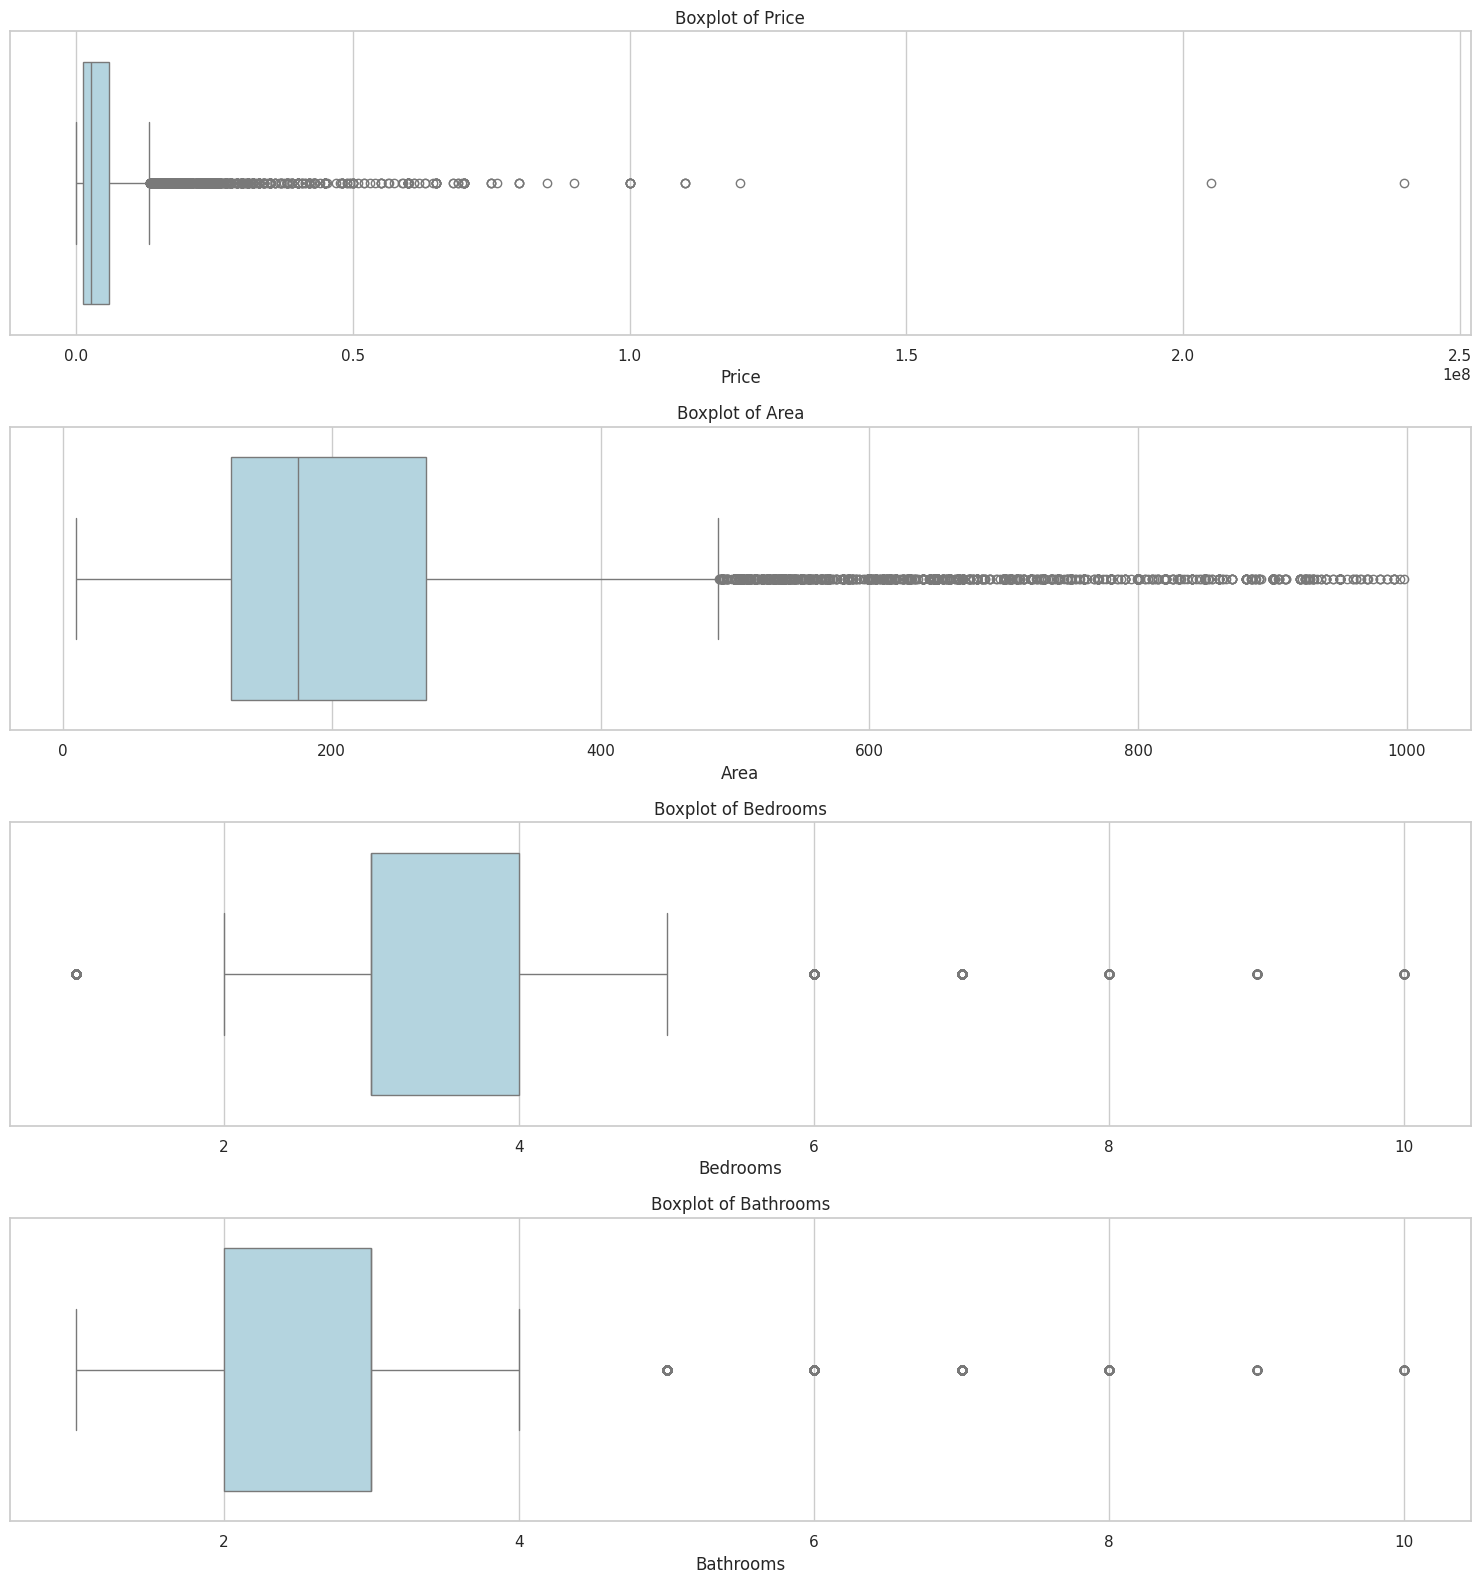

In [175]:
# Function to identify outliers using the IQR method
def identify_outliers_iqr(data, numerical_features):
    outliers = {}
    for feature in numerical_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_condition = (data[feature] < lower_bound) | (data[feature] > upper_bound)
        outliers[feature] = data[outlier_condition]

        print(f"{feature} - Outliers Count: {outliers[feature].shape[0]}")

    return outliers

# Function to visualize outliers with boxplots
def visualize_outliers(data, numerical_features):
    plt.figure(figsize=(15, len(numerical_features) * 4))
    for i, feature in enumerate(numerical_features):
        plt.subplot(len(numerical_features), 1, i + 1)
        sns.boxplot(x=data[feature], color='lightblue')
        plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()

# List of numerical features to analyze
numerical_features = ['Price', 'Area', 'Bedrooms', 'Bathrooms']  # Update with your numerical features

# Identify outliers
outliers = identify_outliers_iqr(data, numerical_features)

# Visualize outliers
visualize_outliers(data, numerical_features)




In [ ]:
#Testing for Model Stability and overfitting and underfitting

In [176]:
from sklearn.metrics import r2_score

def evaluate_model_with_r2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"{model.__class__.__name__} R² Score: Train: {train_r2:.2f}, Test: {test_r2:.2f}")


for model in models:
    evaluate_model_with_r2(model, X_train, y_train, X_test, y_test)

LinearRegression R² Score: Train: 0.44, Test: 0.42
RandomForestRegressor R² Score: Train: 0.91, Test: 0.47
XGBRegressor R² Score: Train: 0.78, Test: 0.47
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 21857, number of used features: 87
[LightGBM] [Info] Start training from score 4794931.580821
LGBMRegressor R² Score: Train: 0.68, Test: 0.52


In [177]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127]
}

# Randomized Search for Random Forest
rf_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_grid_rf, n_iter=50, cv=3, n_jobs=-1)
rf_search.fit(X_train, y_train)
print("Best Random Forest Parameters:", rf_search.best_params_)

# Randomized Search for XGBoost
xgb_search = RandomizedSearchCV(XGBRegressor(objective='reg:squarederror'), param_distributions=param_grid_xgb, n_iter=50, cv=3, n_jobs=-1)
xgb_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_search.best_params_)

# Randomized Search for LightGBM
lgbm_search = RandomizedSearchCV(LGBMRegressor(), param_distributions=param_grid_lgbm, n_iter=50, cv=3, n_jobs=-1)
lgbm_search.fit(X_train, y_train)
print("Best LightGBM Parameters:", lgbm_search.best_params_)

Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': None}
Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 21857, number of used features: 87
[LightGBM] [Info] Start training from score 4794931.580821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Example: Load your data (replace with your actual data loading method)
# data = pd.read_csv('your_data.csv')
# X = data.drop('target', axis=1)  # Features
# y = data['target']  # Target variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the best parameters for each model
rf_params = {
    'n_estimators': 200,
    'min_samples_split': 5,
    'max_features': 'sqrt',
    'max_depth': None
}

xgb_params = {
    'subsample': 1.0,
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1
}

lgb_params = {
    'num_leaves': 127,
    'n_estimators': 100,
    'max_depth': 7,
    'learning_rate': 0.1
}

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)

# Initialize and fit the LightGBM model
lgb_model = lgb.LGBMClassifier(**lgb_params)
lgb_model.fit(X_train, y_train)

# Evaluate the models
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_predictions))

NameError: name 'X_train' is not defined